# Ejercicio 18

## Enunciado
Crea un programa que:

1. Lea los datos referentes a la contaminación de Madrid de Marzo 2020 en un DataFrame de pandas.
2. Indique el número de mediciones tomadas a las 03:00 **no válidas**.
3. Muestre las estadísticas a nivel horario de los registros correspondientes a N02.

## Datos

- Listado de las estaciones de control: [enlace](https://datos.madrid.es/egob/catalogo/212629-1-estaciones-control-aire.csv)
- Datos 2020: [enlace](https://datos.madrid.es/egob/catalogo/201200-10306316-calidad-aire-horario.zip)
- Datos 2019: [enlace](https://datos.madrid.es/egob/catalogo/201200-42-calidad-aire-horario.zip)
- Interpretación de los datos: [enlace](https://datos.madrid.es/FWProjects/egob/Catalogo/MedioAmbiente/Aire/Ficheros/Interprete_ficheros_%20calidad_%20del_%20aire_global.pdf)

### ¿Qué cosas nuevas necesitamos saber?
- DataFrames. La librería **pandas**.

### DataFrames. La librería **pandas**.

Antes de poder utilizar la librería **pandas** debemos instalarla. Para ello, el comando es el siguiente:
```console
pip install -U pandas
```

**NOTA**: Recuerda ejecutar la consola como administrador en el caso de Windows o preceder el comando de **sudo** en el caso de Linux/MacOS.

In [ ]:
# una vez instalada, realizaremos el siguiente import
import pandas as pd

Pero, antes de empezar... qué es pandas?

Pues entre otras cosas, pandas es una librería que nos brinda estructuras de datos denominados DataFrames. Para aquellos que tengáis conocimientos en bases de datos, sería el equivalente (a grosso modo) a una tabla.

#### Importando datos

Para importar datos, existen numerosas opciones en función del origen de los datos.

Todas ellas están disponibles en [este enlace](https://pandas.pydata.org/pandas-docs/stable/reference/io.html).

Veamos un ejemplo de como leer un csv. Para ello utilizaremos los datos del COVID-19 proporcionados por el Ministerio de Sanidad disponibles en [este enlace](https://covid19.isciii.es/resources/serie_historica_acumulados.csv), los cuales debemos descargar.

In [ ]:
# en mi caso los he descargado en el directorio dónde tengo los ejercicios, por lo que lo haré de la siguiente manera:
covid_df = pd.read_csv("serie_historica_acumulados.csv", encoding="ISO-8859-1")

In [ ]:
# observemos que pinta tienen los datos
covid_df

Como podemos comprobar, por defecto nos ha tomado la primera fila como las cabeceras y, dado que lo ha separado correctamente en columnas, ha tomado la coma (,) como separador.

Además, hemos tenido que indicarle el encoding en este caso ya que en la fila 1026 tenemos la palabra n**ú**mero y de no indicarle que el encodig es el correspondiente al alfabeto latino hubiera fallado (podéis comprobarlo quitano el parámetro en cuestión).

Podéis consultar el resto de información (os hará falta) del método [aquí](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html#pandas.read_csv).

Veamos algunas funciones de utilidad:

In [ ]:
covid_df.count() # conteo de registros no nulos (NaN) por columna

In [ ]:
covid_df.describe() # estadísticas de registros no nulos (NaN) por columna numérica

**NOTA**: Las estadíticas anteriores se han calculado sobre la suma total de todos los registros.

Veamos como obtener las estadísticas en base a los últimos datos conocidos

In [ ]:
recent_covid_19 = covid_df[covid_df['FECHA'] == '13/4/2020'] # así obtenemos aquellos registros cuya fecha
# coincide con la máxima observada

In [ ]:
recent_covid_19

Ahora si, obtengamos estadísticas de interes:

In [ ]:
recent_covid_19.describe()

Como podemos comprobar, por ejemplo, la media (mean) de casos por CCAA a 13 de abril está en torno a los 9000, mientras que la CCAA con mas casos (max) es Madrid con 48048 y la que menos (min) es Ceuta con 96.

Eso es todo, a por el ejercicio!

## Solución

In [1]:
import pandas as pd

In [2]:
pollution = pd.read_csv("../Datos/mar_mo19.csv", sep=";")

In [12]:
no_validas = pollution[pollution['V03'] != 'V']

In [13]:
print("Número de mediciones realizadas a las 03:00 no válidas:", len(no_validas))

Número de mediciones realizadas a las 03:00 no válidas: 169


In [14]:
no2 = pollution[pollution['MAGNITUD'] == 8]

In [19]:
columns_with_data = [col for col in no2.columns if col.startswith('H')]

In [21]:
no2_values = pollution[columns_with_data]

In [23]:
no2_values.describe()

,H01,H02,H03,H04,H05,H06,H07,H08,H09,H10,...,H15,H16,H17,H18,H19,H20,H21,H22,H23,H24
count,4669.000000,4669.000000,4669.000000,4669.000000,4669.000000,4669.000000,4669.000000,4669.000000,4669.000000,4669.000000,...,4669.000000,4669.000000,4669.000000,4669.000000,4669.000000,4669.000000,4669.000000,4669.000000,4669.000000,4669.000000
mean,23.270595,20.362712,17.804787,17.115618,16.108265,16.257854,20.643665,30.956558,35.118404,31.317282,...,20.232219,19.324076,18.791150,19.039544,20.575346,25.766582,33.596509,35.692536,30.690439,25.836102
std,36.174432,31.216042,28.017207,25.511420,23.338122,22.645566,27.492339,42.675227,47.862027,41.608188,...,27.105853,28.343226,27.039419,26.168497,27.136390,36.054329,51.626500,57.308153,49.625510,41.560991
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.610000,2.000000,2.300000,...,1.390000,1.270000,1.200000,1.200000,1.160000,1.200000,1.410000,1.500000,1.300000,1.000000
50%,10.000000,9.000000,7.000000,7.000000,7.000000,8.000000,10.000000,13.230000,17.000000,17.000000,...,10.000000,9.000000,8.000000,9.000000,10.000000,12.000000,14.000000,14.000000,13.000000,11.000000
75%,28.000000,25.000000,21.000000,20.000000,19.000000,21.000000,31.000000,46.390000,50.000000,44.000000,...,25.000000,23.000000,22.000000,24.000000,28.000000,39.000000,47.000000,47.000000,40.000000,32.000000
max,521.000000,431.000000,370.000000,342.000000,305.000000,249.000000,255.000000,343.000000,511.000000,444.000000,...,166.000000,674.400000,324.000000,159.000000,255.000000,854.000000,821.000000,689.000000,631.000000,568.000000


### Bonus: ¿A qué hora se da el pico de contaminación?

In [51]:
statistics = no2_values.describe()

In [52]:
statistics

,H01,H02,H03,H04,H05,H06,H07,H08,H09,H10,...,H15,H16,H17,H18,H19,H20,H21,H22,H23,H24
count,4669.000000,4669.000000,4669.000000,4669.000000,4669.000000,4669.000000,4669.000000,4669.000000,4669.000000,4669.000000,...,4669.000000,4669.000000,4669.000000,4669.000000,4669.000000,4669.000000,4669.000000,4669.000000,4669.000000,4669.000000
mean,23.270595,20.362712,17.804787,17.115618,16.108265,16.257854,20.643665,30.956558,35.118404,31.317282,...,20.232219,19.324076,18.791150,19.039544,20.575346,25.766582,33.596509,35.692536,30.690439,25.836102
std,36.174432,31.216042,28.017207,25.511420,23.338122,22.645566,27.492339,42.675227,47.862027,41.608188,...,27.105853,28.343226,27.039419,26.168497,27.136390,36.054329,51.626500,57.308153,49.625510,41.560991
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.610000,2.000000,2.300000,...,1.390000,1.270000,1.200000,1.200000,1.160000,1.200000,1.410000,1.500000,1.300000,1.000000
50%,10.000000,9.000000,7.000000,7.000000,7.000000,8.000000,10.000000,13.230000,17.000000,17.000000,...,10.000000,9.000000,8.000000,9.000000,10.000000,12.000000,14.000000,14.000000,13.000000,11.000000
75%,28.000000,25.000000,21.000000,20.000000,19.000000,21.000000,31.000000,46.390000,50.000000,44.000000,...,25.000000,23.000000,22.000000,24.000000,28.000000,39.000000,47.000000,47.000000,40.000000,32.000000
max,521.000000,431.000000,370.000000,342.000000,305.000000,249.000000,255.000000,343.000000,511.000000,444.000000,...,166.000000,674.400000,324.000000,159.000000,255.000000,854.000000,821.000000,689.000000,631.000000,568.000000


In [69]:
max_values = statistics.loc['max'] # nos quedamos con la fila max

In [70]:
from matplotlib import pyplot as plt

In [71]:
max_value_at = list(max_values).index(max(max_values)) # obtenemos el indice donde se haya el maximo valor

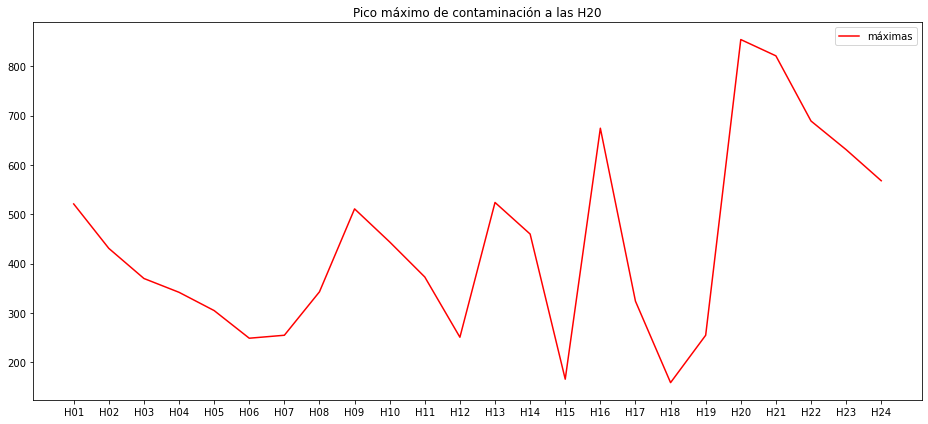

In [72]:
plt.figure(figsize=(13, 6))
plt.plot(max_values.index, max_values, color='red', label='máximas')
plt.legend()
# con una f al comienzo del string podemos insertar valores al "vuelo" entre {} para que se representen en el string
plt.title(f"Pico máximo de contaminación a las {max_values.index[max_value_at]}")
plt.tight_layout()